In [59]:
# Bagged Decision Trees for Classification
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [60]:
fraud= pd.read_csv('Fraud_check(1).csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [61]:
fraud.shape

(600, 6)

In [62]:
fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [63]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [64]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [65]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [66]:
fraud.duplicated().sum()

0

In [67]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<AxesSubplot:>

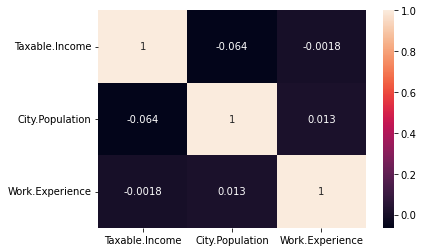

In [68]:
import seaborn as sns
sns.heatmap(fraud.corr(),annot=True)

In [69]:
# Renamning the data
fraud = fraud.rename({'Marital.Status':'Maritial_status','Taxable.Income':'Taxable_income','City.Population':'City_population','Work.Experience':'Work_experience'},axis = 1)
fraud

,Undergrad,Maritial_status,Taxable_income,City_population,Work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [70]:
features= ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban']

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
for feature in features:
    sns.countplot(fraud[feature])
    plt.show()

In [ ]:
categorical_features = fraud.describe(include=["object",'category']).columns
categorical_features

In [ ]:
numerical_features = fraud.describe(include=["int64","float64"]).columns
numerical_features

In [72]:
# converting the catogotical data into numerical 
fraud['Undergrad'] = fraud['Undergrad'].map({'NO':0,'YES':1})
fraud['Maritial_status'] = fraud['Maritial_status'].map({'Single':1,'Divorced':0,'Married':2})
fraud['Urban'] = fraud['Urban'].map({'YES':1,'NO':0})
fraud

,Undergrad,Maritial_status,Taxable_income,City_population,Work_experience,Urban
0,0,1,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,2,36925,160205,30,1
3,1,1,50190,193264,15,1
4,0,2,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,2,98592,180083,17,0


In [73]:
# convering the catogorical data to numeric data according to problem statement
fraud["taxable_income"]="GOOD"
fraud.loc[fraud["Taxable_income"]<=30000,"taxable_income"]="Risky"
fraud.drop(['Taxable_income'],axis = 1,inplace = True)
fraud

,Undergrad,Maritial_status,City_population,Work_experience,Urban,taxable_income
0,0,1,50047,10,1,GOOD
1,1,0,134075,18,1,GOOD
2,0,2,160205,30,1,GOOD
3,1,1,193264,15,1,GOOD
4,0,2,27533,28,0,GOOD
...,...,...,...,...,...,...
595,1,0,39492,7,1,GOOD
596,1,0,55369,2,1,GOOD
597,0,0,154058,0,1,GOOD
598,1,2,180083,17,0,GOOD


In [76]:
from sklearn.model_selection import train_test_split

array = fraud.values
X = array[:,0:5]
Y = array[:,5]

seed=7

# splitting the data into train and test split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33,random_state = seed)


kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7433333333333333


In [77]:
X.shape,Y.shape

((600, 5), (600,))

In [79]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = array[:,0:5]
Y = array[:,5]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7, shuffle = True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7366666666666666


In [80]:
# Splitting the data on train and test 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33,random_state = 0)

In [81]:
# bulding model 
RD = RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
RD.fit(x_train,y_train)# fitting on train data

RandomForestClassifier(max_features=3)

In [83]:
import numpy as np
predict = RD.predict(x_test)# predicting on data
np.mean(predict==y_test)*100

74.74747474747475

In [84]:
# actual vs predicted
df_t = pd.DataFrame({'Actual':y_test, 'Predicted':predict})
df_t

,Actual,Predicted
0,Risky,GOOD
1,Risky,GOOD
2,GOOD,GOOD
3,GOOD,GOOD
4,Risky,GOOD
...,...,...
193,GOOD,GOOD
194,GOOD,GOOD
195,GOOD,GOOD
196,GOOD,GOOD


In [86]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

array = fraud.values

X = array[:,0:5]
Y = array[:,5]

num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed, shuffle = True )
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.7933333333333332


In [87]:
# Stacking Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

array = fraud.values
X = array[:,0:5]
Y = array[:,5]
kfold = KFold(n_splits=10, random_state=7, shuffle = True)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.7933333333333332
